## Import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from itertools import chain
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

## Load data

In [2]:
RAW_recipes_with_one_cuisine=pd.read_csv('../data/RAW_recipes_with_one_cuisine.csv')
RAW_recipes_with_one_cuisine.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Cuisine_Tags
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,['mexican']
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,['northeastern-united-states']
2,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,['northeastern-united-states']
3,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seed', 'green olive', 'ripe olive', '...",9,['canadian']
4,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chili', 'cheese...",5,['southwestern-united-states']


In [3]:
# Convert string to list
RAW_recipes_with_one_cuisine['tags'] = RAW_recipes_with_one_cuisine['tags'].apply(ast.literal_eval)
RAW_recipes_with_one_cuisine['steps'] = RAW_recipes_with_one_cuisine['steps'].apply(ast.literal_eval)
RAW_recipes_with_one_cuisine['ingredients'] = RAW_recipes_with_one_cuisine['ingredients'].apply(ast.literal_eval)
RAW_recipes_with_one_cuisine['Cuisine_Tags'] = RAW_recipes_with_one_cuisine['Cuisine_Tags'].apply(ast.literal_eval)
RAW_recipes_with_one_cuisine.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Cuisine_Tags
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,[mexican]
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, egg, mil...",6,[northeastern-united-states]
2,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,[northeastern-united-states]
3,aww marinated olives,25274,15,21730,2002-04-14,"[15-minutes-or-less, time-to-make, course, mai...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,[toast the fennel seeds and lightly crush them...,my italian mil was thoroughly impressed by my ...,"[fennel seed, green olive, ripe olive, garlic,...",9,[canadian]
4,chile rellenos,43026,45,52268,2002-10-14,"[60-minutes-or-less, time-to-make, course, mai...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"[drain green chiles, sprinkle cornstarch on sh...",a favorite from a local restaurant no longer i...,"[egg roll wrap, whole green chili, cheese, cor...",5,[southwestern-united-states]


## Correlation_Matrix and visualization

In [4]:
# Create a list of all ingredients
all_ingredients_list = list(set(chain.from_iterable(RAW_recipes_with_one_cuisine['ingredients'])))
# Create a binary matrix for the ingredients
mlb = MultiLabelBinarizer(classes=all_ingredients_list)
# Fit and transform the data
ingredient_matrix = mlb.fit_transform(RAW_recipes_with_one_cuisine['ingredients'])
# Create a DataFrame for the binary matrix
ingredient_df = pd.DataFrame(ingredient_matrix, columns=mlb.classes_, index=RAW_recipes_with_one_cuisine.index)
ingredient_df.head()

,white cheese,roasted tomato salsa,light chunk tuna in water,mozzarella cheddar blend cheese,black tea leaf,shiso leaf,low-sugar apricot preserve,caper,pink grapefruit,tabouli mix,...,orecchiette,golden seedless raisin,beef blade roast,"orange, juice of",smoked cod,rome apple,black-eyed pea,best foods mayonnaise,rib eye,clam juice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Add the Cuisine_Tags column to the DataFrame
ingredient_df['Cuisine_Tags']=RAW_recipes_with_one_cuisine['Cuisine_Tags']
ingredient_df.head()

,white cheese,roasted tomato salsa,light chunk tuna in water,mozzarella cheddar blend cheese,black tea leaf,shiso leaf,low-sugar apricot preserve,caper,pink grapefruit,tabouli mix,...,golden seedless raisin,beef blade roast,"orange, juice of",smoked cod,rome apple,black-eyed pea,best foods mayonnaise,rib eye,clam juice,Cuisine_Tags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[mexican]
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[northeastern-united-states]
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[northeastern-united-states]
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[canadian]
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[southwestern-united-states]


In [6]:
# Add the cuisine tags to the DataFrame
ingredient_df['Cuisine'] = ingredient_df['Cuisine_Tags'].apply(lambda x: x[0])
# Aggregate by cuisine
cuisine_ingredient_matrix = ingredient_df.groupby('Cuisine').sum()
cuisine_ingredient_matrix.head(58)

,white cheese,roasted tomato salsa,light chunk tuna in water,mozzarella cheddar blend cheese,black tea leaf,shiso leaf,low-sugar apricot preserve,caper,pink grapefruit,tabouli mix,...,golden seedless raisin,beef blade roast,"orange, juice of",smoked cod,rome apple,black-eyed pea,best foods mayonnaise,rib eye,clam juice,Cuisine_Tags
Cuisine,,,,,,,,,,,,,,,,,,,,,
australian,0,0,0,0,0,0,0,32,3,0,...,1,0,3,1,0,0,0,0,0,"[australian, australian, australian, australia..."
austrian,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[austrian, austrian, austrian, austrian, austr..."
belgian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[belgian, belgian, belgian, belgian, belgian, ..."
brazilian,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,2,"[brazilian, brazilian, brazilian, brazilian, b..."
canadian,0,0,0,1,0,0,1,17,4,0,...,1,2,4,0,1,1,0,0,4,"[canadian, canadian, canadian, canadian, canad..."
chilean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[chilean, chilean, chilean, chilean, chilean, ..."
chinese,0,0,0,0,2,0,0,1,0,0,...,0,0,2,0,0,2,0,0,1,"[chinese, chinese, chinese, chinese, chinese, ..."
colombian,1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,"[colombian, colombian, colombian, colombian, c..."
cuban,0,0,0,0,0,0,0,10,0,0,...,1,0,0,0,0,0,0,0,0,"[cuban, cuban, cuban, cuban, cuban, cuban, cub..."


In [7]:
cuisine_ingredient_matrix.head()

,white cheese,roasted tomato salsa,light chunk tuna in water,mozzarella cheddar blend cheese,black tea leaf,shiso leaf,low-sugar apricot preserve,caper,pink grapefruit,tabouli mix,...,golden seedless raisin,beef blade roast,"orange, juice of",smoked cod,rome apple,black-eyed pea,best foods mayonnaise,rib eye,clam juice,Cuisine_Tags
Cuisine,,,,,,,,,,,,,,,,,,,,,
australian,0,0,0,0,0,0,0,32,3,0,...,1,0,3,1,0,0,0,0,0,"[australian, australian, australian, australia..."
austrian,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[austrian, austrian, austrian, austrian, austr..."
belgian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[belgian, belgian, belgian, belgian, belgian, ..."
brazilian,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,2,"[brazilian, brazilian, brazilian, brazilian, b..."
canadian,0,0,0,1,0,0,1,17,4,0,...,1,2,4,0,1,1,0,0,4,"[canadian, canadian, canadian, canadian, canad..."


In [8]:
# Create a correlation matrix
cuisine_ingredient_matrix=cuisine_ingredient_matrix.drop(columns=['Cuisine_Tags'])
Correlation_Matrix=cuisine_ingredient_matrix.T.corr()
Correlation_Matrix

Cuisine,australian,austrian,belgian,brazilian,canadian,chilean,chinese,colombian,cuban,czech,...,southern-united-states,southwestern-united-states,spanish,swedish,swiss,thai,turkish,venezuelan,vietnamese,welsh
Cuisine,,,,,,,,,,,,,,,,,,,,,
australian,1.000000,0.729112,0.764293,0.810751,0.844029,0.755549,0.516535,0.705507,0.709685,0.704925,...,0.801018,0.675554,0.779806,0.746417,0.810681,0.514379,0.787744,0.718258,0.493108,0.739458
austrian,0.729112,1.000000,0.855209,0.749963,0.876052,0.629146,0.458147,0.653800,0.562448,0.919119,...,0.846454,0.599715,0.571290,0.932688,0.868683,0.366590,0.690113,0.672294,0.422760,0.810562
belgian,0.764293,0.855209,1.000000,0.760538,0.876638,0.682325,0.442650,0.688257,0.633251,0.819683,...,0.846544,0.634382,0.647386,0.848234,0.882310,0.389340,0.722624,0.682501,0.413310,0.814023
brazilian,0.810751,0.749963,0.760538,1.000000,0.841534,0.869815,0.571822,0.831500,0.831897,0.733005,...,0.847845,0.790733,0.826261,0.756421,0.784899,0.599861,0.848345,0.845999,0.613834,0.646065
canadian,0.844029,0.876052,0.876638,0.841534,1.000000,0.759792,0.556817,0.770050,0.702652,0.854927,...,0.947262,0.749014,0.709760,0.896722,0.892735,0.485296,0.801942,0.745894,0.496252,0.817025
chilean,0.755549,0.629146,0.682325,0.869815,0.759792,1.000000,0.528379,0.822682,0.855282,0.615304,...,0.772966,0.820413,0.860358,0.616763,0.696082,0.570264,0.844755,0.832377,0.565440,0.563558
chinese,0.516535,0.458147,0.442650,0.571822,0.556817,0.528379,1.000000,0.563429,0.490301,0.453436,...,0.560122,0.501999,0.475505,0.468054,0.489005,0.704371,0.498553,0.525711,0.699238,0.356768
colombian,0.705507,0.653800,0.688257,0.831500,0.770050,0.822682,0.563429,1.000000,0.745806,0.668594,...,0.775088,0.771189,0.722629,0.678233,0.711388,0.540850,0.800561,0.795166,0.552682,0.602556
cuban,0.709685,0.562448,0.633251,0.831897,0.702652,0.855282,0.490301,0.745806,1.000000,0.533604,...,0.729881,0.815587,0.860156,0.547113,0.638667,0.547873,0.813164,0.734636,0.540278,0.444053


In [9]:
Correlation_Matrix.to_csv('../data/correlation_matrix.csv', index=False)

## Cuisine Similarity Heatmap

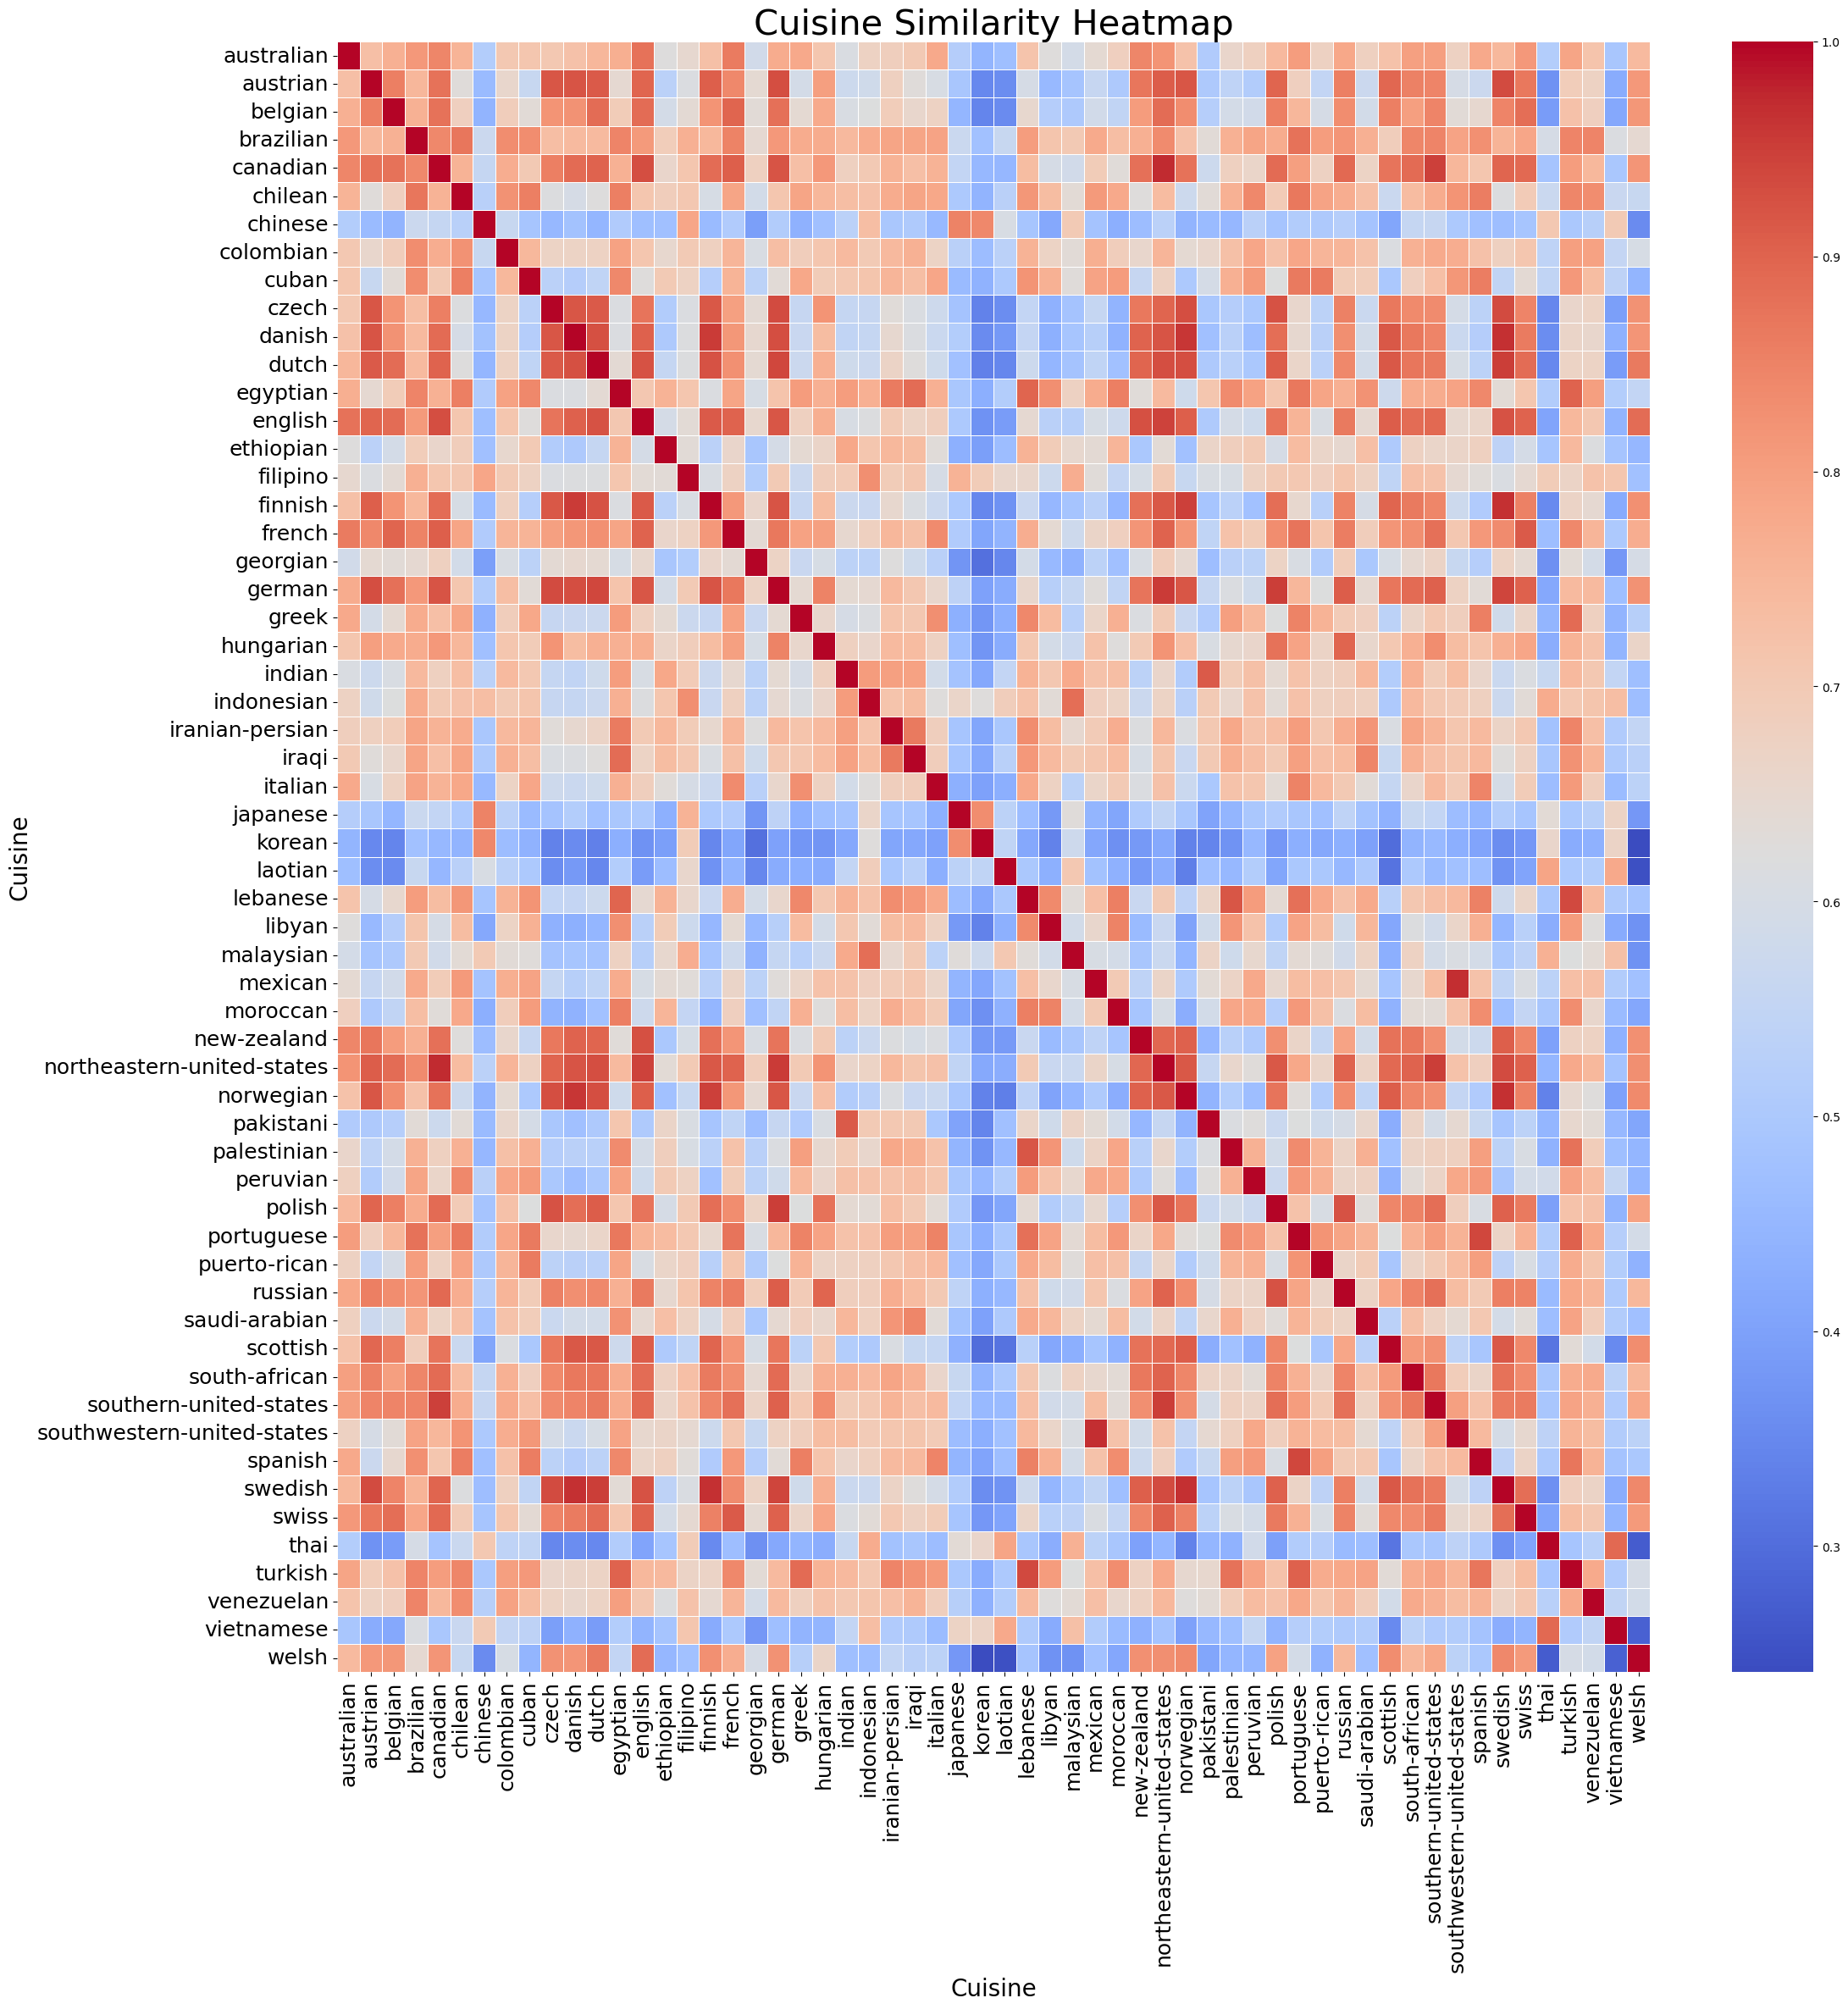

In [10]:
# Create a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(Correlation_Matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Cuisine Similarity Heatmap', fontsize=30)
plt.xlabel('Cuisine', fontsize=20)
plt.ylabel('Cuisine', fontsize=20)

# Set larger font size for tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../image/cuisine_similarity_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


## Clustering Modeling and Matrix Visualization

In [11]:
distance_matrix = 1 - Correlation_Matrix
condensed_distance_matrix = squareform(distance_matrix)
linked = linkage(condensed_distance_matrix, method='average')

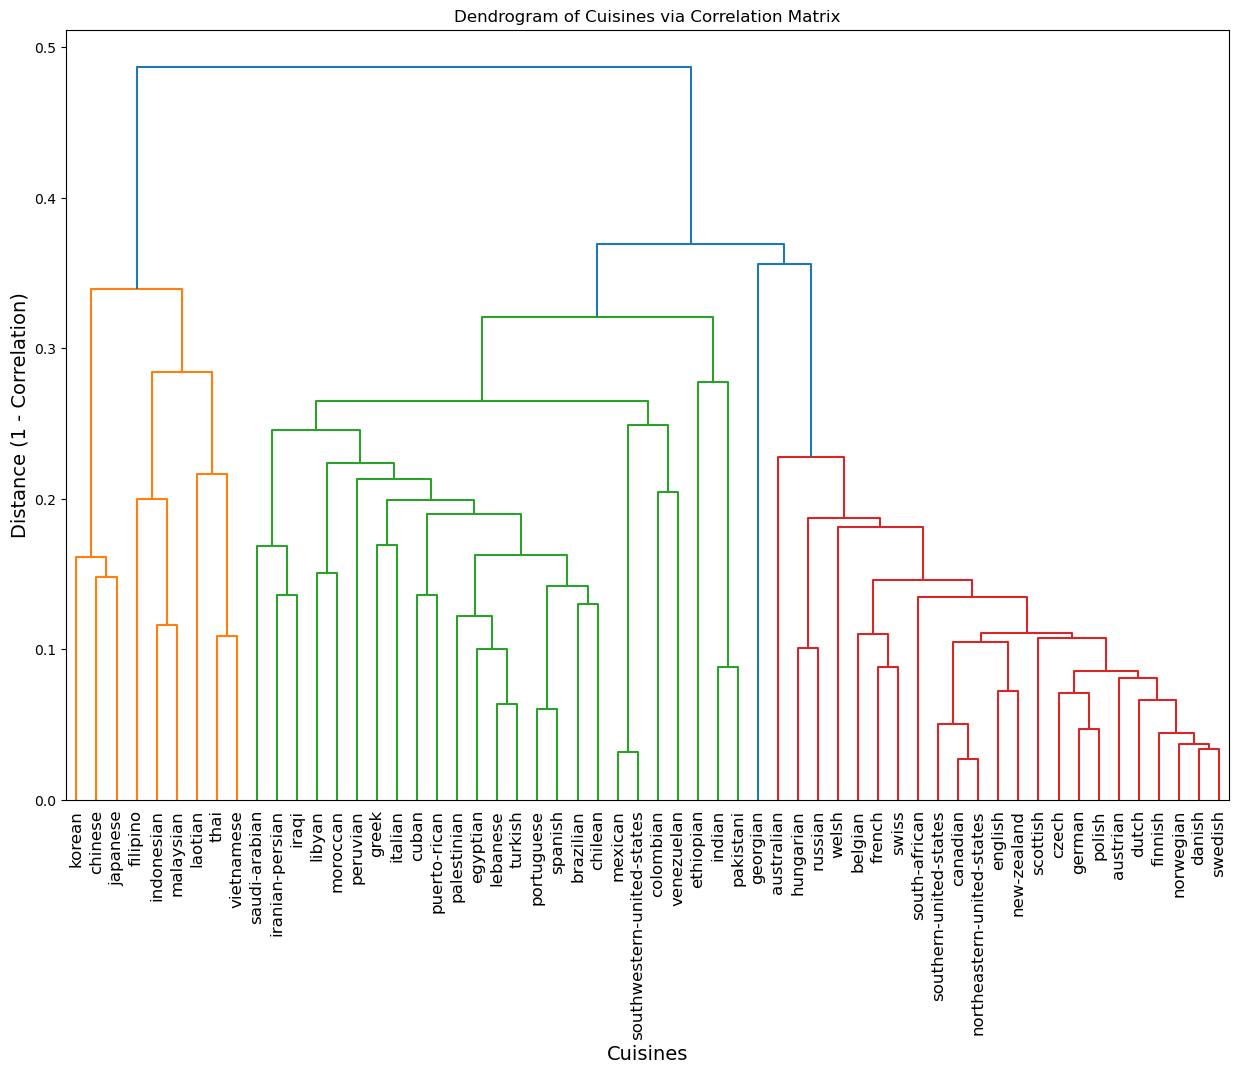

In [12]:
# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked, labels=Correlation_Matrix.index.tolist(), leaf_rotation=90)
plt.title('Dendrogram of Cuisines via Correlation Matrix')
plt.xlabel('Cuisines', fontsize=14)
plt.ylabel('Distance (1 - Correlation)', fontsize=14)
plt.xticks(fontsize=12)
plt.savefig('../image/cuisine_similarity_dendogram.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Create clusters

### Clusters = 30

In [13]:
num_clusters =30
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to the cuisine data
cuisine_clusters = pd.DataFrame({
    'Cuisine': Correlation_Matrix.index,
    'Cluster': cluster_labels
})
# Group by cluster and create a list of cuisines in each cluster
clusters = cuisine_clusters.groupby('Cluster')['Cuisine'].apply(list)
# Convert the Series to a dictionary
clusters_dict = clusters.to_dict()
# Save the dictionary to a JSON file
with open('../data/cuisine_clusters30.json', 'w') as f:
    json.dump(clusters_dict, f, indent=4)

### Clusters = 20

In [14]:
num_clusters =20
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to the cuisine data
cuisine_clusters = pd.DataFrame({
    'Cuisine': Correlation_Matrix.index,
    'Cluster': cluster_labels
})
# Group by cluster and create a list of cuisines in each cluster
clusters = cuisine_clusters.groupby('Cluster')['Cuisine'].apply(list)
# Convert the Series to a dictionary
clusters_dict = clusters.to_dict()
# Save the dictionary to a JSON file
with open('../data/cuisine_clusters20.json', 'w') as f:
    json.dump(clusters_dict, f, indent=4)

### Clusters = 15

In [15]:
num_clusters =15
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to the cuisine data
cuisine_clusters = pd.DataFrame({
    'Cuisine': Correlation_Matrix.index,
    'Cluster': cluster_labels
})
# Group by cluster and create a list of cuisines in each cluster
clusters = cuisine_clusters.groupby('Cluster')['Cuisine'].apply(list)
# Convert the Series to a dictionary
clusters_dict = clusters.to_dict()
# Save the dictionary to a JSON file
with open('../data/cuisine_clusters15.json', 'w') as f:
    json.dump(clusters_dict, f, indent=4)

### Clusters = 10

In [16]:
num_clusters =10
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to the cuisine data
cuisine_clusters = pd.DataFrame({
    'Cuisine': Correlation_Matrix.index,
    'Cluster': cluster_labels
})
# Group by cluster and create a list of cuisines
clusters = cuisine_clusters.groupby('Cluster')['Cuisine'].apply(list)
# Convert the Series to a dictionary
clusters_dict = clusters.to_dict()
# Save the dictionary to a JSON file
with open('../data/cuisine_clusters10.json', 'w') as f:
    json.dump(clusters_dict, f, indent=4)

### Clusters = 5

In [17]:
num_clusters =5
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to the cuisine data
cuisine_clusters = pd.DataFrame({
    'Cuisine': Correlation_Matrix.index,
    'Cluster': cluster_labels
})
# Group the data by cluster and convert the Cuisine column to a list
clusters = cuisine_clusters.groupby('Cluster')['Cuisine'].apply(list)
# Convert the Series to a dictionary
clusters_dict = clusters.to_dict()
# Save the dictionary to a JSON file
with open('../data/cuisine_clusters5.json', 'w') as f:
    json.dump(clusters_dict, f, indent=4)